<a href="https://colab.research.google.com/github/salsabilaqonita/heart-disease-detection-app/blob/main/Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💻 Portfolio Project: Machine Learning Model Training on Heart Disease Dataset  
**By: Salsabila Qonita Kaltsum**

---

📌 **Project Description**  
This project involves building and evaluating machine learning models to predict heart disease using a dataset provided by DQLab, adapted from the UCI repository. It includes data preprocessing, exploratory data analysis (EDA), feature selection, and model evaluation.

📂 **Dataset**  
- Source: [Heart Disease CSV](https://storage.googleapis.com/dqlab-dataset/heart_disease.csv)  
- Format: CSV file with 14 columns and binary target (0 = no disease, 1 = disease)  
- Columns:
  - `age`, `sex`, `cp`, `trestbps`, `chol`, `fbs`, `restecg`, `thalach`, `exang`, `oldpeak`, `slope`, `ca`, `thal`, `target`

🛠️ **Tools & Technologies**  
- Python (Google Colab)  
- Pandas, NumPy  
- Matplotlib, Seaborn  
- Scikit-learn  

🎯 **Objectives**  
- Load and preprocess heart disease dataset  
- Perform exploratory data analysis (EDA)  
- Train classification models (e.g., Logistic Regression, KNN, Random Forest)  
- Evaluate performance using metrics such as accuracy, precision, recall, and F1-score  
- Identify the best-performing model for prediction

---



## Part 1 - Processing

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
# Memuat dataset Heart Disease UCI ML
url = "https://storage.googleapis.com/dqlab-dataset/heart_disease.csv"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=column_names, skiprows=[0])

# Menampilkan lima baris teratas
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Melihat persebaran data
data.describe(include=[np.number])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.nunique()

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Melakukan handling kolom menjadi kategorikal
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'target']
data[lst] = data[lst].astype(object)

# Melihat perubahan
data.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,object
restecg,object
thalach,int64
exang,object
oldpeak,float64


In [ ]:
# Pelabelan data categorical
data['sex'] = data['sex'].replace({1: 'Male',
                                   0: 'Female'})
data['cp'] = data['cp'].replace({0: 'typical angina',
                                 1: 'atypical angina',
                                 2: 'non-anginal pain',
                                 3: 'asymtomatic'})
data['fbs'] = data['fbs'].replace({0: 'No',
                                   1: 'Yes'})
data['restecg'] = data['restecg'].replace({0: 'probable or definite left ventricular hypertrophy',
                                           1:'normal',
                                           2: 'ST-T Wave abnormal'})
data['exang'] = data['exang'].replace({0: 'No',
                                       1: 'Yes'})
data['slope'] = data['slope'].replace({0: 'downsloping',
                                       1: 'flat',
                                       2: 'upsloping'})
data['thal'] = data['thal'].replace({1: 'normal',
                                     2: 'fixed defect',
                                     3: 'reversable defect'})
data['ca'] = data['ca'].replace({0: 'Number of major vessels: 0',
                                 1: 'Number of major vessels: 1',
                                 2: 'Number of major vessels: 2',
                                 3: 'Number of major vessels: 3'})
data['target'] = data['target'].replace({0: 'No disease',
                                         1: 'Disease'})

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical angina,125,212,No,normal,168,No,1.0,upsloping,Number of major vessels: 2,reversable defect,No disease
1,53,Male,typical angina,140,203,Yes,probable or definite left ventricular hypertrophy,155,Yes,3.1,downsloping,Number of major vessels: 0,reversable defect,No disease
2,70,Male,typical angina,145,174,No,normal,125,Yes,2.6,downsloping,Number of major vessels: 0,reversable defect,No disease
3,61,Male,typical angina,148,203,No,normal,161,No,0.0,upsloping,Number of major vessels: 1,reversable defect,No disease
4,62,Female,typical angina,138,294,Yes,normal,106,No,1.9,flat,Number of major vessels: 3,fixed defect,No disease


In [ ]:
# Pisahkan numerical dan categorical
numerical_col = data.select_dtypes(exclude=object)
categorical_col = data.select_dtypes(exclude='number')

In [ ]:
numerical_col.head()

,age,trestbps,chol,thalach,oldpeak
0,52,125,212,168,1.0
1,53,140,203,155,3.1
2,70,145,174,125,2.6
3,61,148,203,161,0.0
4,62,138,294,106,1.9


In [ ]:
categorical_col.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,Male,typical angina,No,normal,No,upsloping,Number of major vessels: 2,reversable defect,No disease
1,Male,typical angina,Yes,probable or definite left ventricular hypertrophy,Yes,downsloping,Number of major vessels: 0,reversable defect,No disease
2,Male,typical angina,No,normal,Yes,downsloping,Number of major vessels: 0,reversable defect,No disease
3,Male,typical angina,No,normal,No,upsloping,Number of major vessels: 1,reversable defect,No disease
4,Female,typical angina,Yes,normal,No,flat,Number of major vessels: 3,fixed defect,No disease


In [ ]:
# Pengecekan karakter dari data kategorikal
for i in categorical_col:
    print("Berikut ini merupakan informasi: {} dengan {}".format(i, data[i].unique()))
    print()

Berikut ini merupakan informasi: sex dengan ['Male' 'Female']

Berikut ini merupakan informasi: cp dengan ['typical angina' 'atypical angina' 'non-anginal pain' 'asymtomatic']

Berikut ini merupakan informasi: fbs dengan ['No' 'Yes']

Berikut ini merupakan informasi: restecg dengan ['normal' 'probable or definite left ventricular hypertrophy'
 'ST-T Wave abnormal']

Berikut ini merupakan informasi: exang dengan ['No' 'Yes']

Berikut ini merupakan informasi: slope dengan ['upsloping' 'downsloping' 'flat']

Berikut ini merupakan informasi: ca dengan ['Number of major vessels: 2' 'Number of major vessels: 0'
 'Number of major vessels: 1' 'Number of major vessels: 3' 4]

Berikut ini merupakan informasi: thal dengan ['reversable defect' 'fixed defect' 'normal' 0]

Berikut ini merupakan informasi: target dengan ['No disease' 'Disease']



In [ ]:
# Melihat jumlah nilai unik dari kolom 'ca'
data['ca'].nunique()

5

In [ ]:
data['ca'].unique()

array(['Number of major vessels: 2', 'Number of major vessels: 0',
       'Number of major vessels: 1', 'Number of major vessels: 3', 4],
      dtype=object)

Ada data di kolom 'ca' yang bernilai '4' sebanyak 18. Padahal nilai '4' harusnya tidak ada.

In [ ]:
# Menemukan baris dengan kolom 'ca' bernilai '4'
data[data['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
83,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
128,52,Male,non-anginal pain,138,223,No,normal,169,No,0.0,upsloping,4,fixed defect,Disease
208,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
242,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
290,52,Male,non-anginal pain,138,223,No,normal,169,No,0.0,upsloping,4,fixed defect,Disease
340,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
348,43,Male,typical angina,132,247,Yes,probable or definite left ventricular hypertrophy,143,Yes,0.1,flat,4,reversable defect,No disease
417,52,Male,non-anginal pain,138,223,No,normal,169,No,0.0,upsloping,4,fixed defect,Disease
428,43,Male,typical angina,132,247,Yes,probable or definite left ventricular hypertrophy,143,Yes,0.1,flat,4,reversable defect,No disease


In [ ]:
# Ganti kolom 'ca' yang bernilai '4' menjadi NaN
data.loc[data['ca']==4, 'ca'] = np.nan

In [ ]:
data['ca'].value_counts()

,count
ca,
Number of major vessels: 0,578
Number of major vessels: 1,226
Number of major vessels: 2,134
Number of major vessels: 3,69


In [ ]:
data['thal'].value_counts()

,count
thal,
fixed defect,544
reversable defect,410
normal,64
0,7


Ada data di kolom 'thal' yang bernilai '0' sebanyak 7. Padahal nilai '0' harusnya tidak ada.

In [ ]:
# Menemukan baris dengan kolom 'thal' bernilai '0'
data[data['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,Male,typical angina,128,204,Yes,normal,156,Yes,1.0,flat,Number of major vessels: 0,0,No disease
319,53,Female,non-anginal pain,128,216,No,probable or definite left ventricular hypertrophy,115,No,0.0,upsloping,Number of major vessels: 0,0,Disease
329,53,Female,non-anginal pain,128,216,No,probable or definite left ventricular hypertrophy,115,No,0.0,upsloping,Number of major vessels: 0,0,Disease
359,53,Female,non-anginal pain,128,216,No,probable or definite left ventricular hypertrophy,115,No,0.0,upsloping,Number of major vessels: 0,0,Disease
686,52,Male,typical angina,128,204,Yes,normal,156,Yes,1.0,flat,Number of major vessels: 0,0,No disease
734,52,Male,typical angina,128,204,Yes,normal,156,Yes,1.0,flat,Number of major vessels: 0,0,No disease
893,52,Male,typical angina,128,204,Yes,normal,156,Yes,1.0,flat,Number of major vessels: 0,0,No disease


In [ ]:
# Ganti kolom 'thal' yang bernilai '0' menjadi NaN
data.loc[data['thal']==0, 'thal'] = np.nan

In [ ]:
data['thal'].value_counts()

,count
thal,
fixed defect,544
reversable defect,410
normal,64


### Missing values

In [ ]:
# Check missing values
print("Hasil missing value:\n", data.isnull().sum())

Hasil missing value:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca          18
thal         7
target       0
dtype: int64


In [ ]:
print(data['ca'].mode())
print(data['thal'].mode())

0    Number of major vessels: 0
Name: ca, dtype: object
0    fixed defect
Name: thal, dtype: object


In [ ]:
# Fillna pada kolom 'ca' dengan modus
modus_ca = data['ca'].mode()[0]
data['ca'] = data['ca'].fillna(modus_ca)

# Fillna pada kolom 'thal' dengan modus
modus_thal = data['thal'].mode()[0]
data['thal'] = data['thal'].fillna(modus_thal)

In [ ]:
# Check missing values kembali
print("Hasil missing value:\n", data.isnull().sum())

Hasil missing value:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### Duplicates

In [ ]:
# Memeriksa duplikat data
data.duplicated().sum()

np.int64(723)

In [ ]:
# Menampilkan baris data duplicate
data[data.duplicated()].sort_values(by='age')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
64,29,Male,atypical angina,130,204,No,probable or definite left ventricular hypertrophy,202,No,0.0,upsloping,Number of major vessels: 0,fixed defect,Disease
668,29,Male,atypical angina,130,204,No,probable or definite left ventricular hypertrophy,202,No,0.0,upsloping,Number of major vessels: 0,fixed defect,Disease
118,29,Male,atypical angina,130,204,No,probable or definite left ventricular hypertrophy,202,No,0.0,upsloping,Number of major vessels: 0,fixed defect,Disease
572,34,Male,asymtomatic,118,182,No,probable or definite left ventricular hypertrophy,174,No,0.0,upsloping,Number of major vessels: 0,fixed defect,Disease
779,34,Female,atypical angina,118,210,No,normal,192,No,0.7,upsloping,Number of major vessels: 0,fixed defect,Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,74,Female,atypical angina,120,269,No,probable or definite left ventricular hypertrophy,121,Yes,0.2,upsloping,Number of major vessels: 1,fixed defect,Disease
535,76,Female,non-anginal pain,140,197,No,ST-T Wave abnormal,116,No,1.1,flat,Number of major vessels: 0,fixed defect,Disease
965,76,Female,non-anginal pain,140,197,No,ST-T Wave abnormal,116,No,1.1,flat,Number of major vessels: 0,fixed defect,Disease
387,77,Male,typical angina,125,304,No,probable or definite left ventricular hypertrophy,162,Yes,0.0,upsloping,Number of major vessels: 3,fixed defect,No disease


In [ ]:
# Menghapus data duplikat
data.drop_duplicates(keep='first', inplace=True)

# Memeriksa ulang duplikat data
data.duplicated().sum()

np.int64(0)

### EDA & Visualizations

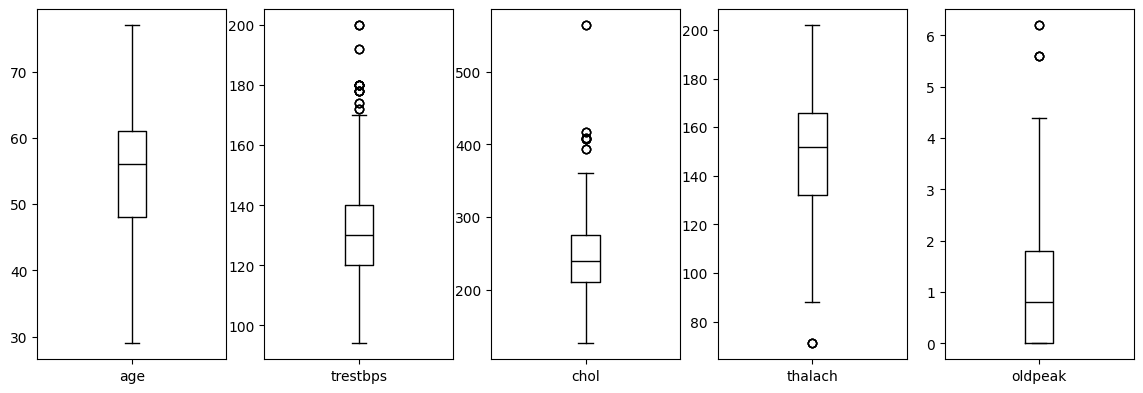

In [ ]:
#Menampilkan boxplot untuk melihat outliers data numerik
numerical_col.plot(kind = 'box', subplots = True, layout = (2,7), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

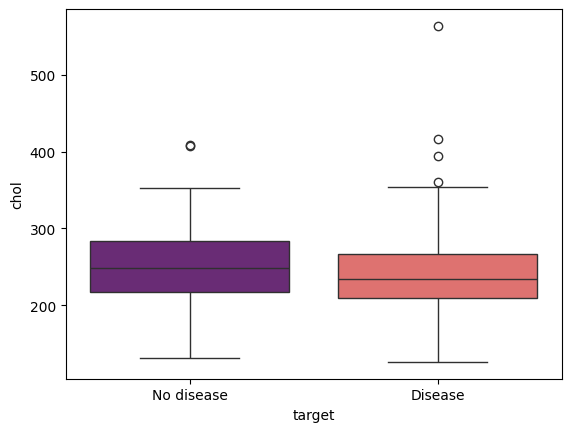

In [ ]:
# Menampilkan data berdasarkan target untuk feature chol
sns.boxplot(data=data, x='target', y='chol', hue='target', palette='magma')
plt.show()

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
#Mencari tahu data yang outliers dengan mendefinisikan fungsi
continous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
            print('For the feature {}, Num of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            data.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(data[continous_features], drop=False)

For the feature age, Num of Outliers is 0
For the feature trestbps, Num of Outliers is 9
For the feature chol, Num of Outliers is 5
For the feature thalach, Num of Outliers is 1
For the feature oldpeak, Num of Outliers is 5


In [ ]:
# Menghapus outlier dengan fungsi sebelumnya
outliers(data[continous_features], drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


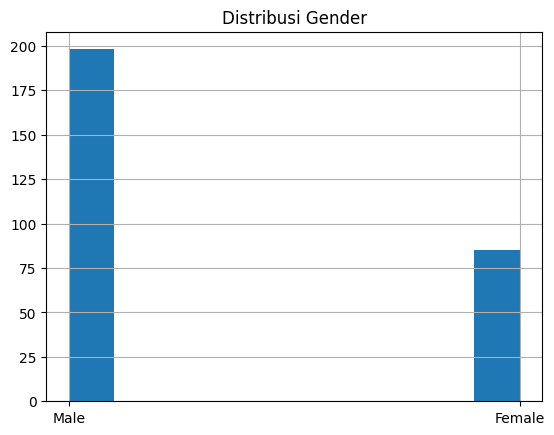

In [ ]:
# Jumlah kategori sex pada dataset
data['sex'].hist().plot(kind='bar', hue='sex')
plt.title('Distribusi Gender')
plt.show()

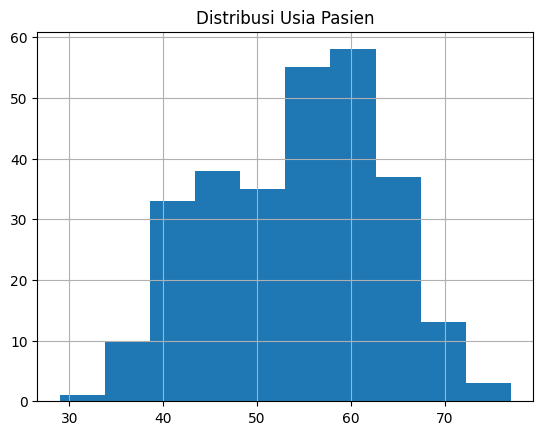

In [ ]:
# Jumlah kategori age pada dataset
data['age'].hist().plot(kind='bar')
plt.title('Distribusi Usia Pasien')
plt.show()

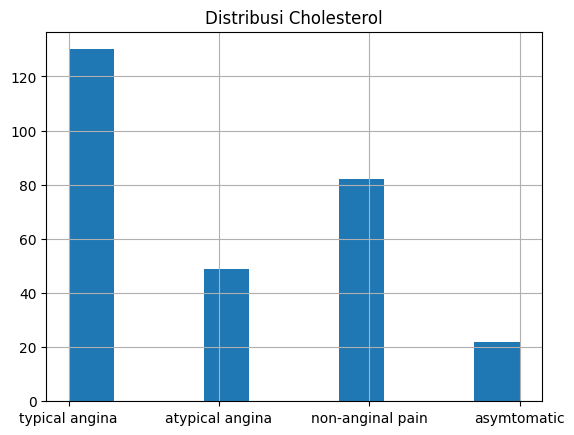

In [ ]:
# Jumlah kategori cp pada dataset
data['cp'].hist().plot(kind='bar')
plt.title('Distribusi Cholesterol')
plt.show()

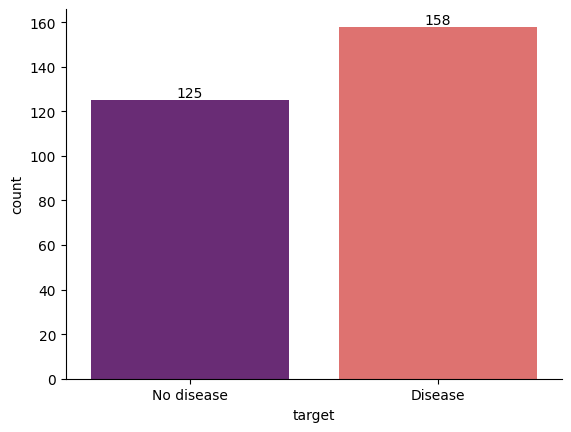

In [ ]:
# Memeriksa data imbalance
ax = sns.countplot(data=data, x='target', hue='target', palette='magma')
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.show()

In [ ]:
data.shape

(283, 14)

In [ ]:
# Melihat statistik deskriptif dari data
data.describe(include='number')

,age,trestbps,chol,thalach,oldpeak
count,283.000000,283.000000,283.000000,283.000000,283.000000
mean,54.049470,129.883392,242.314488,149.961131,0.951943
std,9.128186,15.387795,44.654188,22.691625,1.026400
min,29.000000,94.000000,126.000000,88.000000,0.000000
25%,47.000000,120.000000,210.500000,133.500000,0.000000
50%,55.000000,130.000000,239.000000,153.000000,0.600000
75%,60.000000,140.000000,270.500000,168.000000,1.600000
max,77.000000,170.000000,360.000000,202.000000,4.000000


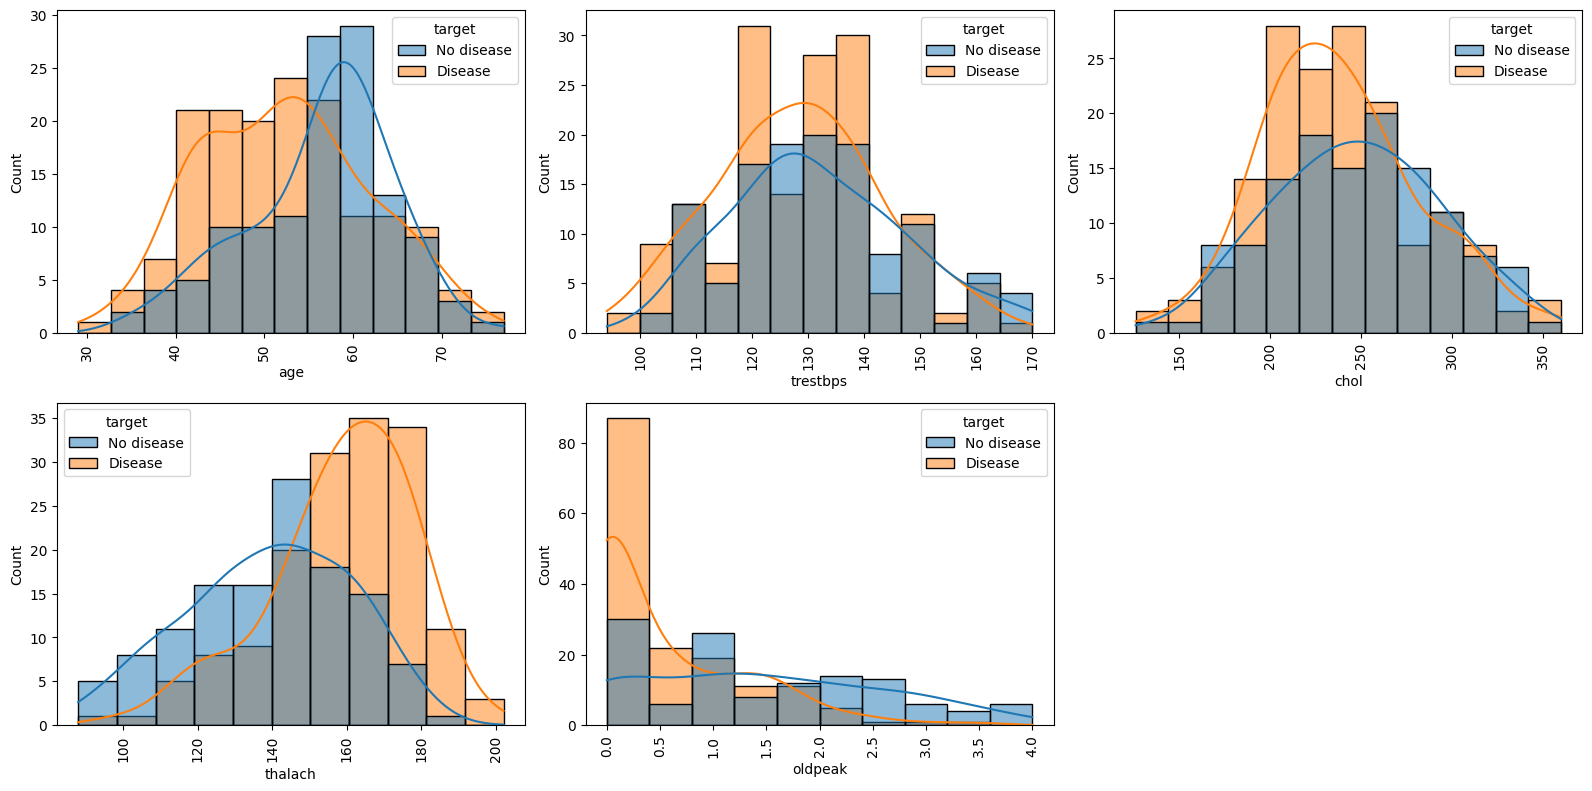

In [ ]:
# Memvisualisasikan distribusi variabel numerical
plt.figure(figsize=(16,8))
for index,column in enumerate(numerical_col):
    plt.subplot(2,3,index+1)
    sns.histplot(data=data,x=column,kde=True, hue='target')
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

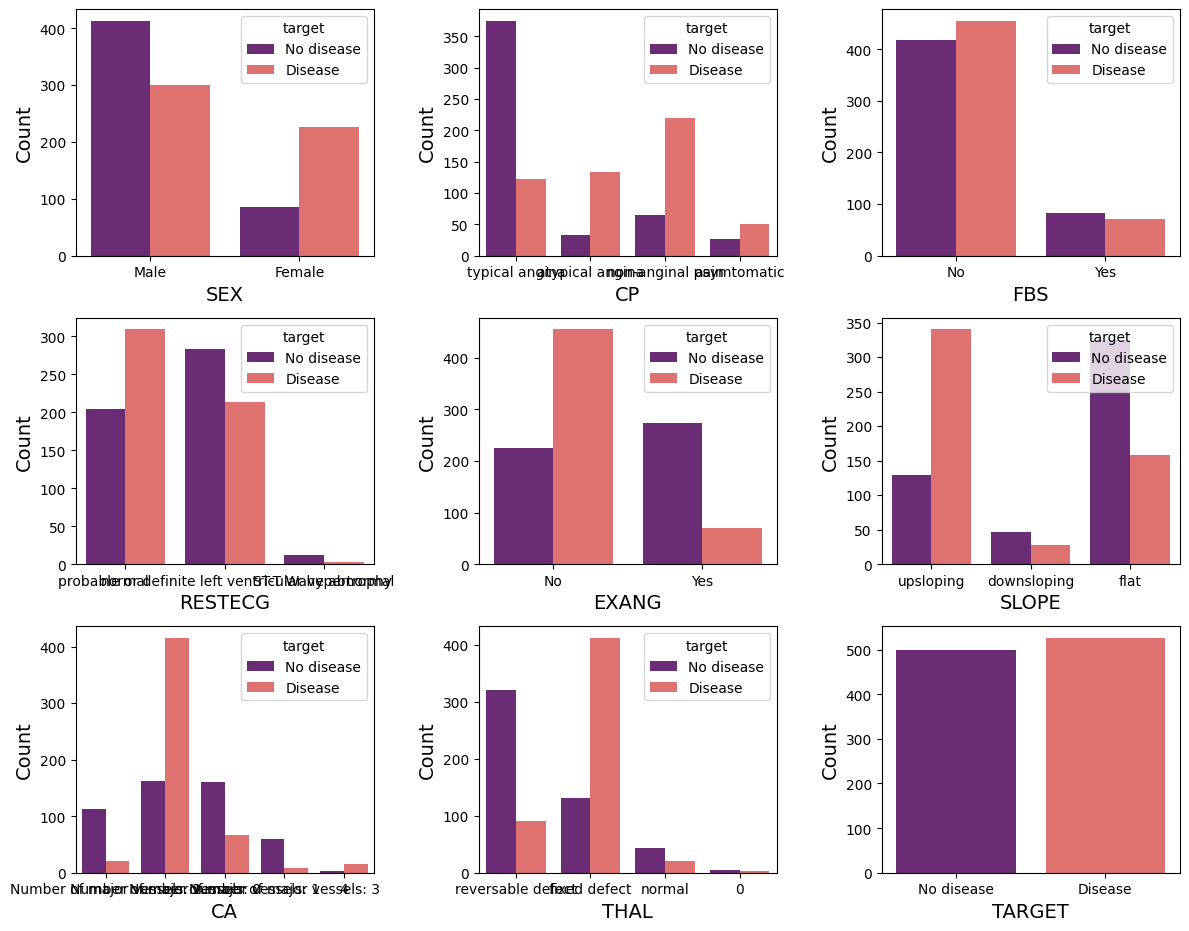

In [ ]:
# Memvisualisasikan distribusi variabel kategorikal
plt.figure(figsize=(12,12))
for index, column in enumerate(categorical_col):
    plt.subplot(4, 3, index+1)
    sns.countplot(data=categorical_col,x=column, hue='target', palette='magma')
    plt.xlabel(column.upper(),fontsize=14)
    plt.ylabel("Count", fontsize=14)

plt.tight_layout(pad = 1.0)
plt.show()

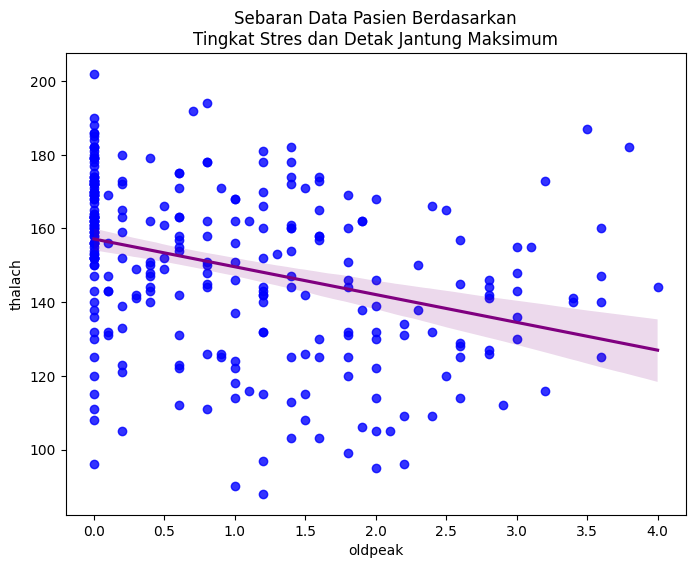

In [ ]:
# melihat korelasi tingkat depresi dan detak jantung maksimum
plt.figure(figsize = (8,6))
sns.regplot(data=data, x='oldpeak', y='thalach', scatter_kws = {'color':'blue'}, line_kws = {'color':'purple'})
plt.title('Sebaran Data Pasien Berdasarkan\nTingkat Stres dan Detak Jantung Maksimum')
plt.show()

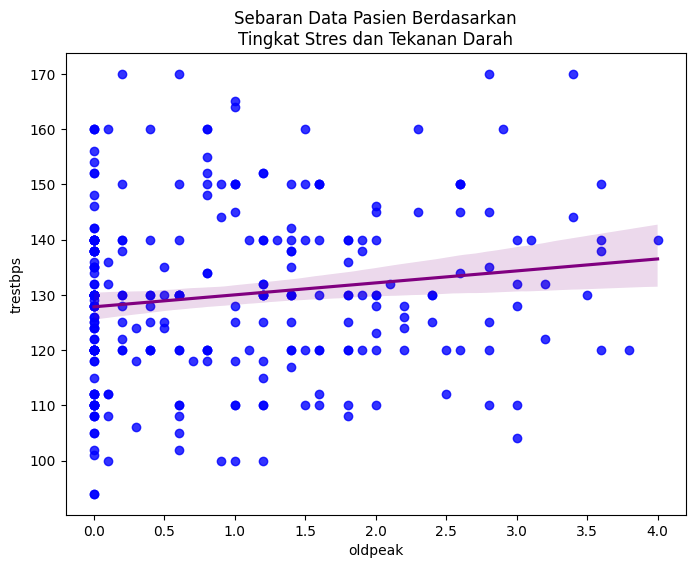

In [ ]:
# melihat korelasi tingkat depresi dan tekanan darah
plt.figure(figsize = (8,6))
sns.regplot(data=data, x='oldpeak', y='trestbps', scatter_kws = {'color':'blue'}, line_kws = {'color':'purple'})
plt.title('Sebaran Data Pasien Berdasarkan\nTingkat Stres dan Tekanan Darah')
plt.show()

In [ ]:
# Simpan data yang sudah ada label
data.to_csv('data_prep.csv')

In [ ]:
# Melabeli kembali datanya
df = pd.read_csv('data_prep.csv', index_col=0)

In [ ]:

df['sex'] = df['sex'].replace({'Male' : 1,'Female': 0})
df['cp'] = df['cp'].replace({'typical angina' : 0, 'atypical angina' : 1, 'non-anginal pain' : 2, 'asymtomatic' : 3})
df['fbs'] = df['fbs'].replace({'No' : 0, 'Yes' : 1})
df['restecg'] = df['restecg'].replace({'probable or definite left ventricular hypertrophy':0,'normal':1,'ST-T Wave abnormal':2})
df['exang'] = df['exang'].replace({'No':0,'Yes':1})
df['slope'] = df['slope'].replace({'downsloping':0, 'flat':1,'upsloping':2})
df['thal'] = df['thal'].replace({'normal':1, 'fixed defect':2,'reversable defect':3})
df['ca'] = df['ca'].replace({'Number of major vessels: 0':0, 'Number of major vessels: 1':1,'Number of major vessels: 2':2, 'Number of major vessels: 3':3})
df['target'] = df['target'].replace({'No disease':0,'Disease':1})

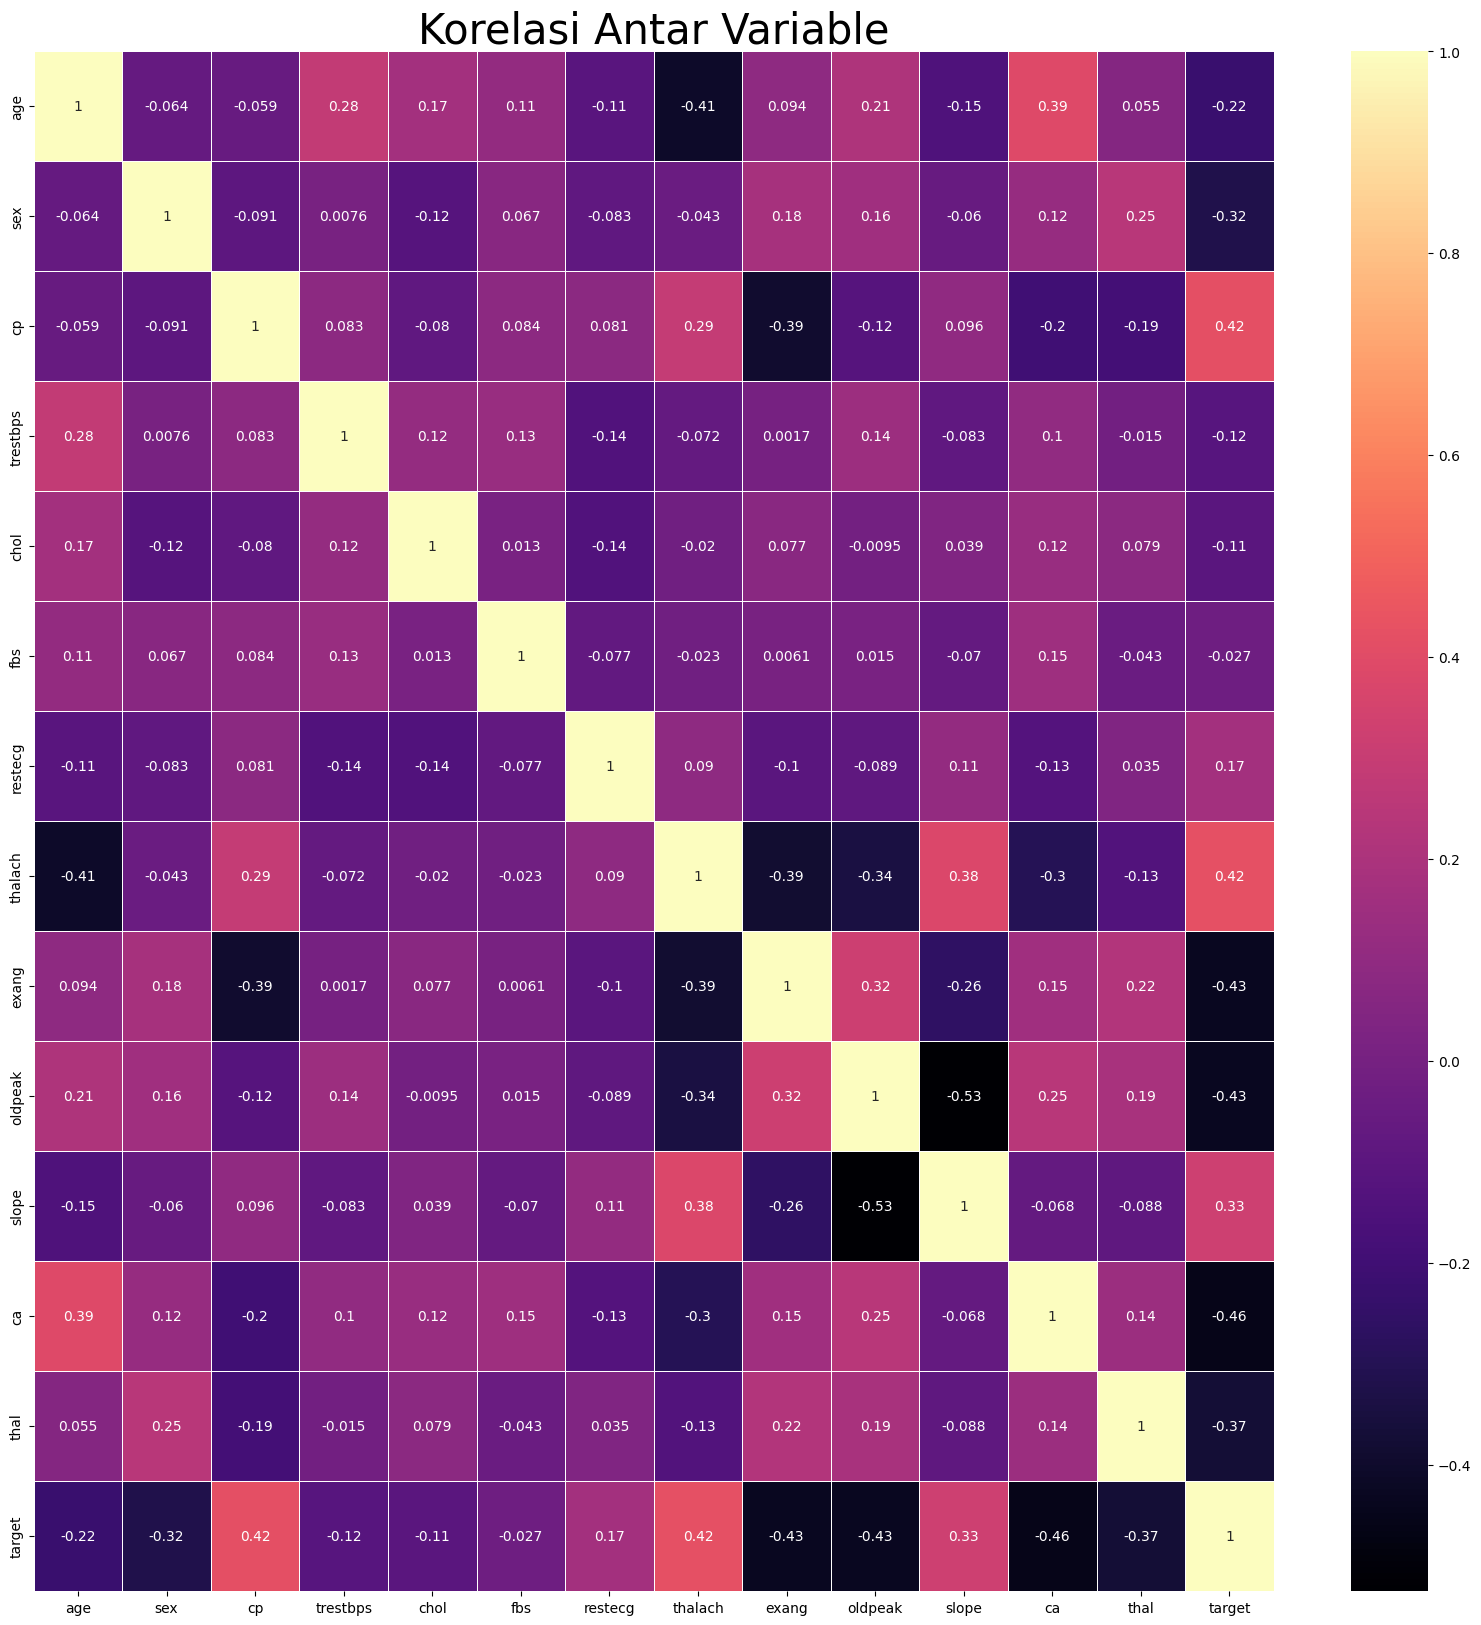

In [ ]:
# melihat korelasi antar variable untuk mencari feature yang penting
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor,annot=True, linewidth=.5, cmap="magma")
plt.title('Korelasi Antar Variable', fontsize = 30)
plt.show()

In [ ]:
cor_matrix = df.corr()

cor_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.064118,-0.058687,0.282669,0.171015,0.106885,-0.110517,-0.411108,0.093718,0.209254,-0.149095,0.392130,0.054752,-0.222416
sex,-0.064118,1.000000,-0.091357,0.007572,-0.123863,0.066692,-0.083290,-0.042981,0.182596,0.157352,-0.060014,0.122489,0.245682,-0.318896
cp,-0.058687,-0.091357,1.000000,0.083242,-0.080369,0.084389,0.080836,0.285605,-0.388610,-0.122582,0.095881,-0.202923,-0.188487,0.416319
trestbps,0.282669,0.007572,0.083242,1.000000,0.115138,0.127221,-0.139228,-0.071600,0.001726,0.144438,-0.083024,0.101059,-0.014615,-0.115614
chol,0.171015,-0.123863,-0.080369,0.115138,1.000000,0.013066,-0.142285,-0.020128,0.076547,-0.009534,0.039352,0.124800,0.078868,-0.105627
fbs,0.106885,0.066692,0.084389,0.127221,0.013066,1.000000,-0.077417,-0.023484,0.006080,0.015070,-0.069563,0.150552,-0.042766,-0.027210
restecg,-0.110517,-0.083290,0.080836,-0.139228,-0.142285,-0.077417,1.000000,0.089556,-0.104440,-0.089255,0.111841,-0.126825,0.035452,0.171453
thalach,-0.411108,-0.042981,0.285605,-0.071600,-0.020128,-0.023484,0.089556,1.000000,-0.387726,-0.341190,0.376494,-0.296480,-0.134498,0.422559
exang,0.093718,0.182596,-0.388610,0.001726,0.076547,0.006080,-0.104440,-0.387726,1.000000,0.318620,-0.259780,0.154768,0.223241,-0.431599
oldpeak,0.209254,0.157352,-0.122582,0.144438,-0.009534,0.015070,-0.089255,-0.341190,0.318620,1.000000,-0.525142,0.245318,0.189228,-0.434108


In [ ]:
#Mengurutkan korelasi
cor_matrix['target'].sort_values()

,target
ca,-0.456989
oldpeak,-0.434108
exang,-0.431599
thal,-0.370759
sex,-0.318896
age,-0.222416
trestbps,-0.115614
chol,-0.105627
fbs,-0.027210
restecg,0.171453


In [ ]:
variabel = ['cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex', 'age']
analyze = df[variabel]

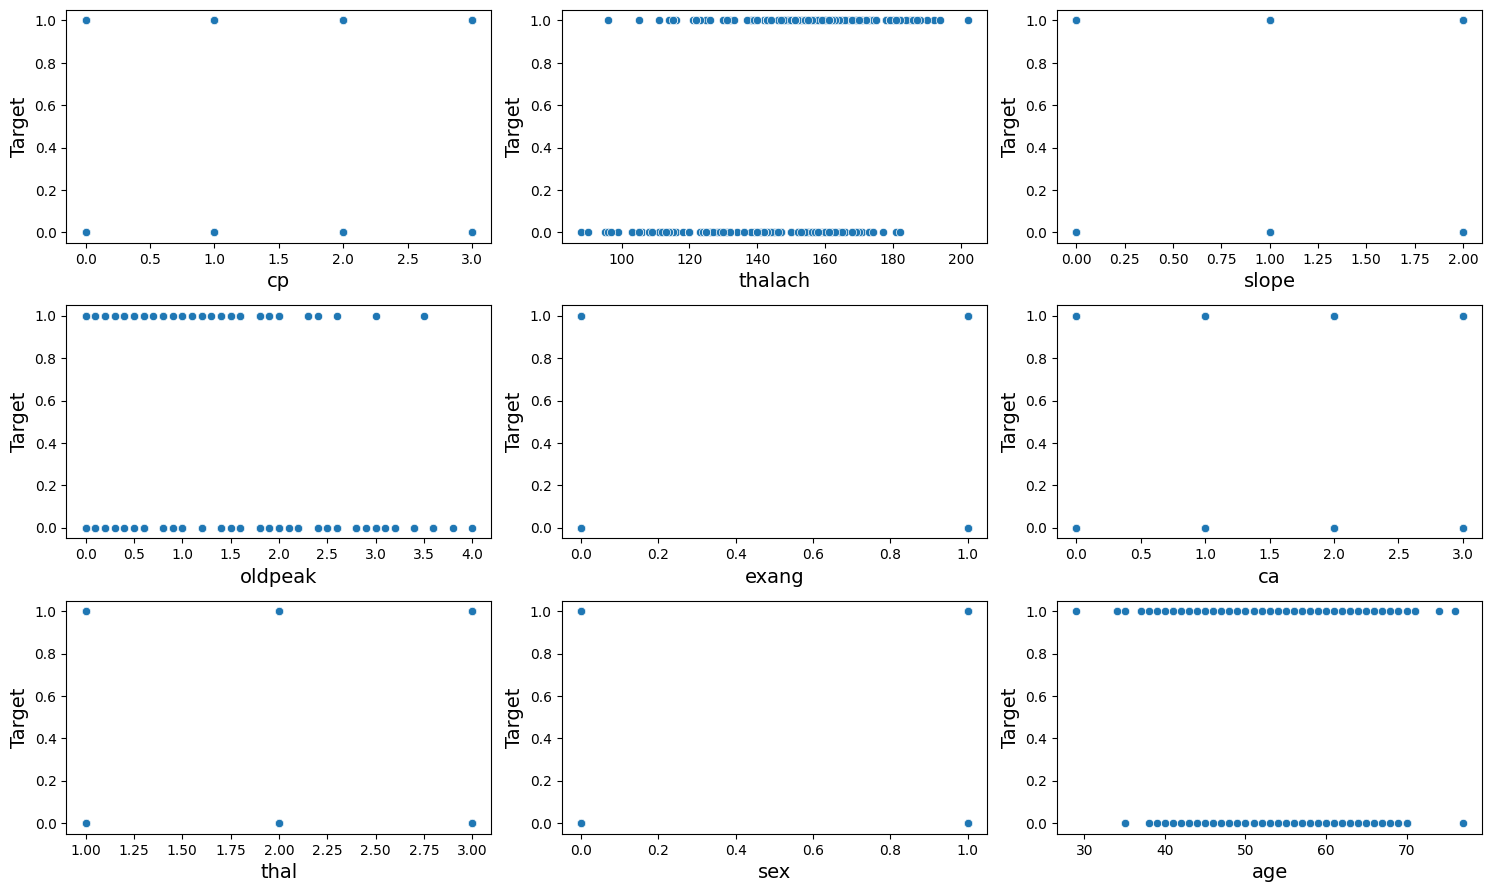

In [ ]:
fig = plt.figure(figsize=(15,9))
for index in range(len(analyze.columns)):
    plt.subplot(3,3,index + 1)
    sns.scatterplot(x = analyze.iloc[:,index],y=df.target,data = analyze)
    plt.xlabel(analyze.columns[index], fontsize=14)
    plt.ylabel("Target", fontsize=14)

fig.tight_layout(pad = 1.0)

In [ ]:
var_pairplot = ['cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex', 'age', 'target']
df1 = df[var_pairplot]

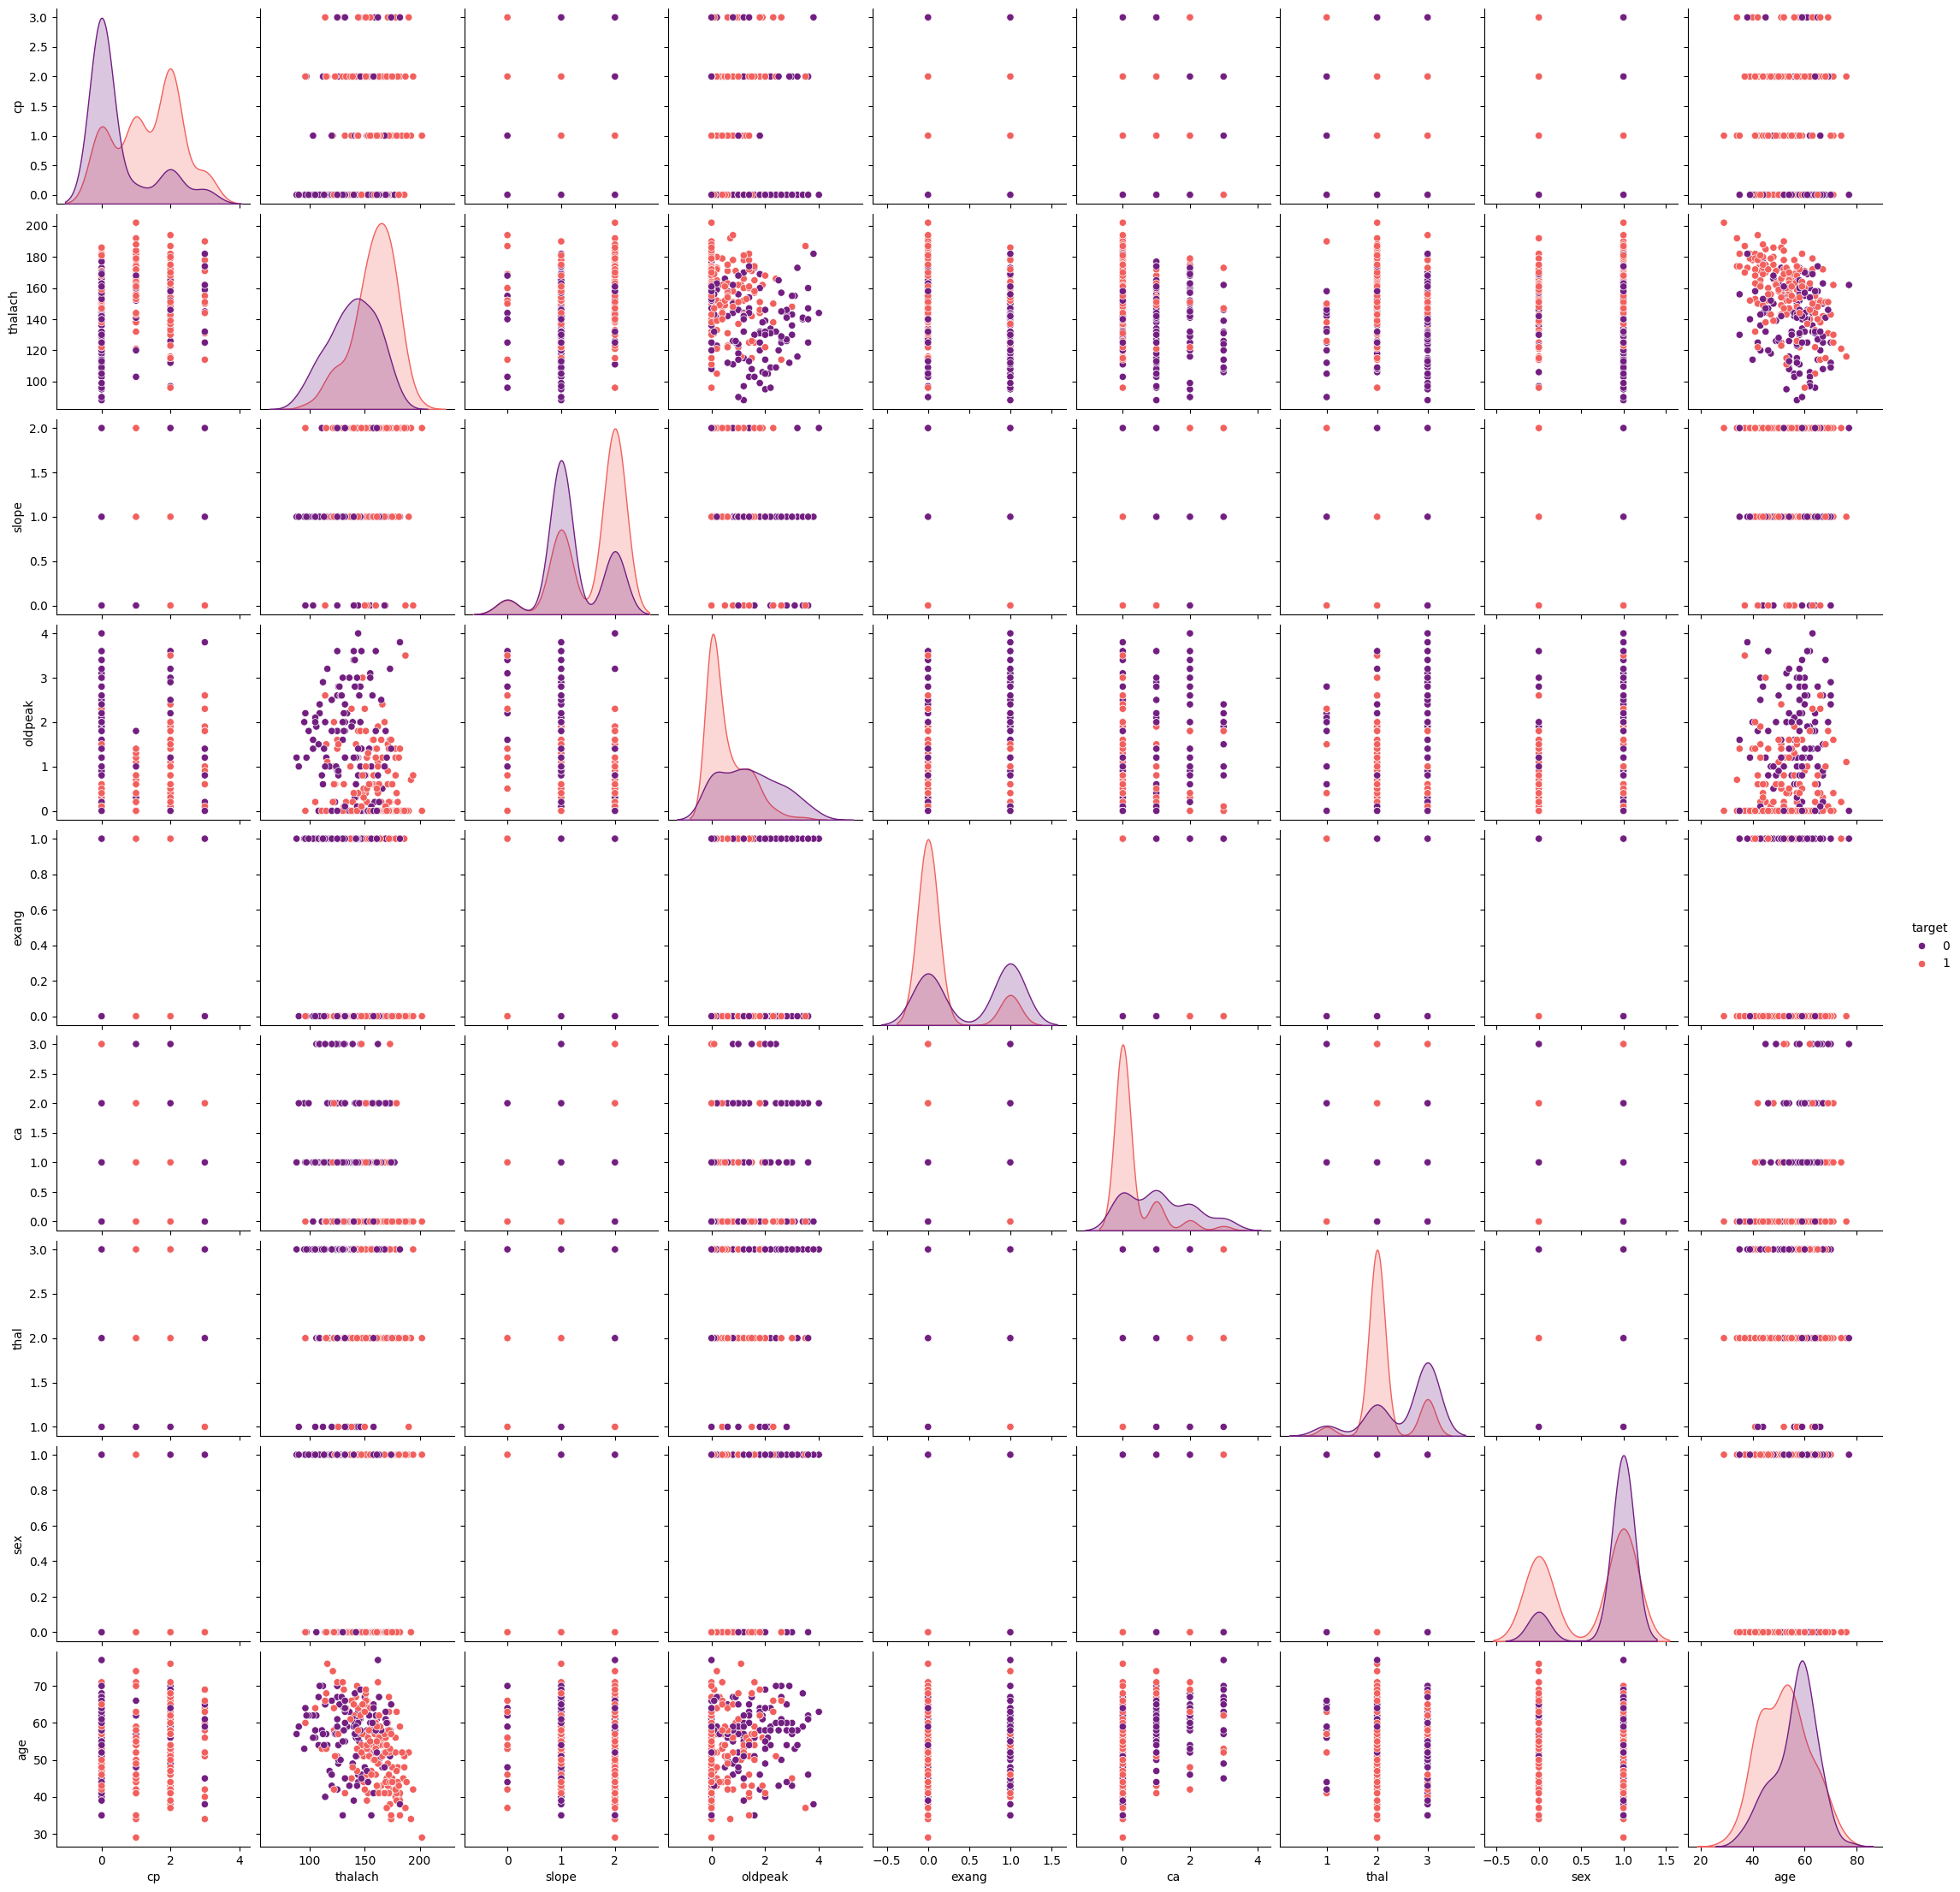

In [ ]:
sns.pairplot(df1, hue='target', palette='magma')
plt.show()

### Data Scaling

In [ ]:
# Mendefinisikan standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop("target", axis=1))

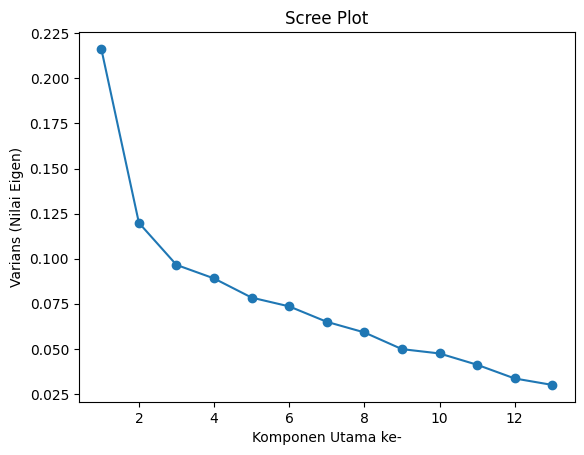

In [ ]:
# Perform PCA for dimensionality reduction
feature_number = len(X_scaled[0])
pca = PCA(n_components=feature_number)

# Fit PCA with dataset
pca.fit(X_scaled)

# Get variance information
variance_ratio = pca.explained_variance_ratio_

# Calculate cummulative
cumulative_variance = np.cumsum(variance_ratio)

# Create Scree Plot
plt.plot(range(1, len(variance_ratio) + 1), variance_ratio, marker='o')
plt.xlabel('Komponen Utama ke-')
plt.ylabel('Varians (Nilai Eigen)')
plt.title('Scree Plot')
plt.show()

In [ ]:
pca = PCA(n_components=9)
heart_data_reduced = pca.fit_transform(X_scaled)

In [ ]:
feature_names = df.drop('target', axis=1).columns.to_list()
component_names = [f"PC{i+1}" for i in range(pca.n_components_)]

for component, component_name in zip(pca.components_, component_names):
    feature_indices = component.argsort()[::-1]
    retained_features = [feature_names[idx] for idx in feature_indices[:pca.n_components_]]
    print(f"{component_name}: {retained_features}")

PC1: ['thalach', 'slope', 'cp', 'restecg', 'fbs', 'chol', 'trestbps', 'sex', 'thal']
PC2: ['trestbps', 'age', 'cp', 'fbs', 'chol', 'ca', 'slope', 'thalach', 'oldpeak']
PC3: ['chol', 'slope', 'ca', 'thal', 'exang', 'age', 'thalach', 'restecg', 'sex']
PC4: ['sex', 'fbs', 'thal', 'thalach', 'slope', 'ca', 'trestbps', 'cp', 'exang']
PC5: ['restecg', 'ca', 'age', 'thal', 'slope', 'fbs', 'cp', 'sex', 'oldpeak']
PC6: ['thal', 'trestbps', 'chol', 'cp', 'oldpeak', 'restecg', 'thalach', 'sex', 'age']
PC7: ['fbs', 'chol', 'restecg', 'exang', 'thal', 'thalach', 'oldpeak', 'cp', 'trestbps']
PC8: ['trestbps', 'exang', 'restecg', 'slope', 'fbs', 'sex', 'age', 'thalach', 'thal']
PC9: ['thal', 'age', 'cp', 'fbs', 'slope', 'exang', 'trestbps', 'sex', 'chol']


## Part 2 - Modelling

In [ ]:
# Variabel terpilih
df = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]

In [ ]:
# Liat informasi dari dataset yang kita miliki
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       283 non-null    int64  
 1   sex       283 non-null    int64  
 2   cp        283 non-null    int64  
 3   trestbps  283 non-null    int64  
 4   chol      283 non-null    int64  
 5   fbs       283 non-null    int64  
 6   restecg   283 non-null    int64  
 7   thalach   283 non-null    int64  
 8   exang     283 non-null    int64  
 9   oldpeak   283 non-null    float64
 10  slope     283 non-null    int64  
 11  ca        283 non-null    int64  
 12  thal      283 non-null    int64  
 13  target    283 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155   

In [ ]:
# Define X and y
X = df.loc[:, df.columns != 'target']
y = df['target']

In [ ]:
# Melihat kolom yang termasuk variabel bebas
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [ ]:
# Melihat variabel terikat
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Mendefinisikan standard scaler
scaler = StandardScaler()
# Melakukan scaling data
X_scaled = scaler.fit_transform(X)

In [ ]:
# Mendefinisikan pemisahan data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

# Menampilkan hasil pemisahan berdasarkan kolom dan baris
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(226, 13)
(57, 13)
(226,)
(57,)


In [ ]:
# Import additional librabries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = LogisticRegression()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Logistric Regression Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression Classifier is  0.8070175438596491


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        23
           1       0.87      0.79      0.83        34

    accuracy                           0.81        57
   macro avg       0.80      0.81      0.80        57
weighted avg       0.81      0.81      0.81        57



In [ ]:
confusion_matrix(y_test, y_pred)

array([[19,  4],
       [ 7, 27]])

In [ ]:
clf = DecisionTreeClassifier()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Decision Tree Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree Classifier is  0.7017543859649122


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.65      0.64        23
           1       0.76      0.74      0.75        34

    accuracy                           0.70        57
   macro avg       0.69      0.69      0.69        57
weighted avg       0.70      0.70      0.70        57



In [ ]:
clf = RandomForestClassifier()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Random Forest Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest Classifier is  0.8421052631578947


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.88      0.85      0.87        34

    accuracy                           0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57



In [ ]:
clf = MLPClassifier()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of MLP Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of MLP Classifier is  0.8245614035087719


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        23
           1       0.88      0.82      0.85        34

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.83      0.82      0.83        57



Hyperparameter Tuning

In [ ]:
clf = LogisticRegression()

param_grid = {
    'max_iter': [100, 200, 300],
    'multi_class': ['ovr', 'multinomial'],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

gs1 = GridSearchCV(
        estimator= clf,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_clf_lg = gs1.fit(X_train, y_train)

print(fit_clf_lg.best_params_)
print(fit_clf_lg.best_score_)

{'max_iter': 100, 'multi_class': 'ovr', 'solver': 'newton-cg'}
0.9105841269841269


In [ ]:
y_pred = fit_clf_lg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        23
           1       0.87      0.79      0.83        34

    accuracy                           0.81        57
   macro avg       0.80      0.81      0.80        57
weighted avg       0.81      0.81      0.81        57



In [ ]:
clf = RandomForestClassifier()

param_grid = {'n_estimators': [10, 100, 200],
               'max_depth': [None, 5, 10],
               'criterion': ['gini', 'entropy']}

gs1 = GridSearchCV(
        estimator=clf,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_clf_rf = gs1.fit(X_train, y_train)

print(fit_clf_rf.best_params_)
print(fit_clf_rf.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
0.9166539682539682


In [ ]:
y_pred = fit_clf_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76        23
           1       0.83      0.85      0.84        34

    accuracy                           0.81        57
   macro avg       0.80      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



In [ ]:
clf = DecisionTreeClassifier()

param_grid = {'min_samples_leaf': [1, 2, 3],
               'max_depth': [None, 5, 10],
               'criterion': ['gini', 'entropy']}

gs1 = GridSearchCV(
        estimator=clf,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_clf_dt = gs1.fit(X_train, y_train)

print(fit_clf_dt.best_params_)
print(fit_clf_dt.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3}
0.8249333333333334


In [ ]:
y_pred = fit_clf_dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        23
           1       0.90      0.79      0.84        34

    accuracy                           0.82        57
   macro avg       0.82      0.83      0.82        57
weighted avg       0.84      0.82      0.83        57



In [ ]:
clf = MLPClassifier()

param_grid = {
               'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
               'activation': ['tanh', 'relu'],
               'solver': ['sgd', 'adam'],
               'alpha': [0.0001, 0.05],
               'learning_rate': ['constant','adaptive']
               }

gs1 = GridSearchCV(
        estimator=clf,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_clf_mlp = gs1.fit(X_train, y_train)

print(fit_clf_mlp.best_params_)
print(fit_clf_mlp.best_score_)

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.9185460317460317


In [ ]:
y_pred = fit_clf_mlp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        23
           1       0.91      0.85      0.88        34

    accuracy                           0.86        57
   macro avg       0.85      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57



ROC Analysis

In [ ]:
y_pred_logreg = fit_clf_lg.predict_proba(X_test)[:, 1]
y_pred_rf = fit_clf_rf.predict_proba(X_test)[:, 1]
y_pred_dt= fit_clf_dt.predict_proba(X_test)[:, 1]
y_pred_mlp= fit_clf_mlp.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC scores
auc_logreg = roc_auc_score(y_test, y_pred_logreg)
auc_rf = roc_auc_score(y_test, y_pred_rf)
auc_dt = roc_auc_score(y_test, y_pred_dt)
auc_mlp = roc_auc_score(y_test, y_pred_mlp)

print(f"AUC-ROC for Logistic Regression: {auc_logreg}")
print(f"AUC-ROC for Random Forest: {auc_rf}")
print(f"AUC-ROC for Decision Tree: {auc_dt}")
print(f"AUC-ROC for MLP: {auc_mlp}")

AUC-ROC for Logistic Regression: 0.8951406649616369
AUC-ROC for Random Forest: 0.9079283887468031
AUC-ROC for Decision Tree: 0.8631713554987213
AUC-ROC for MLP: 0.8989769820971867


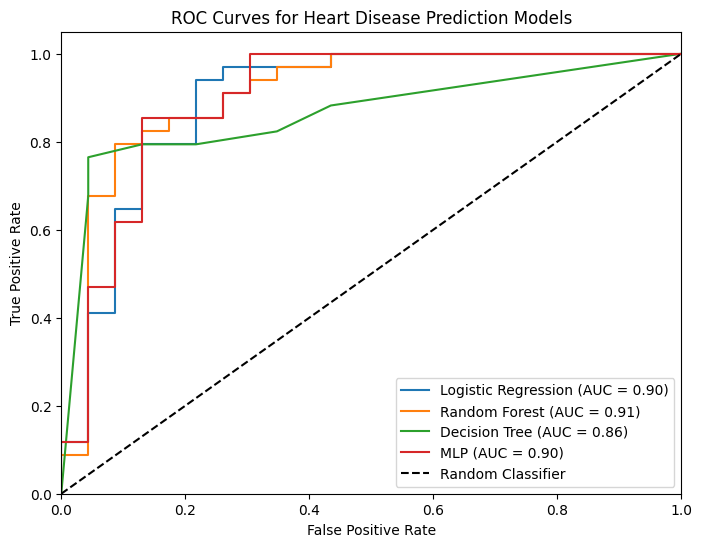

In [ ]:
#Membuat ROC Analisis
def plot_roc_curves(y_test, y_pred_logreg, y_pred_rf, y_pred_dt, y_pred_mlp):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curves for each model
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
    fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)

    # Plot ROC curves
    plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
    plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
    plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')

    # Plot random classifier
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

    # Set the plot limits
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Heart Disease Prediction Models')
    plt.legend()
    plt.show()

plot_roc_curves(y_test, y_pred_logreg, y_pred_rf, y_pred_dt, y_pred_mlp)

In [ ]:
def find_rates_for_thresholds(y_test, y_pred, thresholds):
    fpr_list = []
    tpr_list = []
    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
        fpr = fp / (fp + tn)
        tpr = tp / (tp + fn)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
    return fpr_list, tpr_list

thresholds = np.arange(0, 1.1, 0.1)

fpr_logreg, tpr_logreg = find_rates_for_thresholds(y_test, y_pred_logreg, thresholds)
fpr_rf, tpr_rf = find_rates_for_thresholds(y_test, y_pred_rf, thresholds)
fpr_dt, tpr_dt = find_rates_for_thresholds(y_test, y_pred_dt, thresholds)
fpr_mlp, tpr_mlp = find_rates_for_thresholds(y_test, y_pred_mlp, thresholds)

summary_df = pd.DataFrame({
    'Threshold': thresholds,
    'FPR Logistic Regression': fpr_logreg,
    'TPR Logistic Regression': tpr_logreg,
    'FPR Random Forest': fpr_rf,
    'TPR Random Forest': tpr_rf,
    'FPR Decision Tree': fpr_dt,
    'TPR Decision Tree': tpr_dt,
    'FPR MLP': fpr_mlp,
    'TPR MLP': tpr_mlp
})

In [ ]:
summary_df

,Threshold,FPR Logistic Regression,TPR Logistic Regression,FPR Random Forest,TPR Random Forest,FPR Decision Tree,TPR Decision Tree,FPR MLP,TPR MLP
0,0.0,1.000000,1.000000,1.000000,1.000000,0.478261,0.911765,1.000000,1.000000
1,0.1,0.434783,1.000000,0.652174,1.000000,0.478261,0.911765,0.608696,1.000000
2,0.2,0.304348,0.970588,0.521739,1.000000,0.478261,0.911765,0.304348,0.970588
3,0.3,0.304348,0.970588,0.478261,0.941176,0.391304,0.852941,0.304348,0.970588
4,0.4,0.217391,0.882353,0.347826,0.911765,0.217391,0.794118,0.260870,0.941176
5,0.5,0.173913,0.794118,0.260870,0.882353,0.130435,0.794118,0.173913,0.882353
6,0.6,0.130435,0.735294,0.130435,0.764706,0.130435,0.794118,0.130435,0.794118
7,0.7,0.130435,0.735294,0.086957,0.617647,0.130435,0.794118,0.130435,0.735294
8,0.8,0.086957,0.558824,0.043478,0.411765,0.043478,0.676471,0.086957,0.588235
9,0.9,0.086957,0.441176,0.043478,0.323529,0.043478,0.676471,0.043478,0.441176


In [ ]:
def find_best_threshold(y_test, y_pred):
    # based on Youden's Index
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    #j_scores = tpr - fpr
    #j_ordered = sorted(zip(j_scores, thresholds))
    #best_idx = np.argmax(j_scores)
    optimal_idx = np.argmax(tpr - fpr)
    best_threshold = thresholds[optimal_idx]

    return best_threshold

best_threshold_logreg = find_best_threshold(y_test, y_pred_logreg)
best_threshold_rf = find_best_threshold(y_test, y_pred_rf)
best_threshold_dt = find_best_threshold(y_test, y_pred_dt)
best_threshold_mlp = find_best_threshold(y_test, y_pred_mlp)

print(f"Best threshold for Logistic Regression: {best_threshold_logreg}")
print(f"Best threshold for Random Forest: {best_threshold_rf}")
print(f"Best threshold for Decision Tree: {best_threshold_dt}")
print(f"Best threshold for MLP: {best_threshold_mlp}")

Best threshold for Logistic Regression: 0.3848694094987442
Best threshold for Random Forest: 0.6396795974872913
Best threshold for Decision Tree: 0.8
Best threshold for MLP: 0.5134502507187996


Export Selected Model

In [ ]:
import pickle
# Menyimpan model terbaik dengan pickle
pklname = 'best_model_rf.pkl'

with open(pklname, 'wb') as file:
    pickle.dump(fit_clf_rf, file)